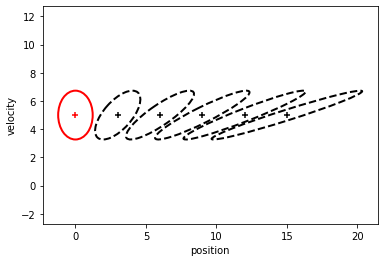

In [2]:

from filterpy.stats import plot_covariance_ellipse
import kf_book.book_plots as book_plots
import numpy as np



dt = 0.6
x = np.array([0., 5.])
F = np.array([[1., dt], [0, 1.]])
P = np.array([[1.5, 0], [0, 3.]])
plot_covariance_ellipse(x, P, edgecolor='r')

for _ in range(5):
    x = F @ x
    P = F @ P @ F.T
    plot_covariance_ellipse(x, P, edgecolor='k', ls='dashed')
book_plots.set_labels(x='position', y='velocity')

This is actually important, and could help you understand more on the math behind. Basically, what we are seeing is a continuous prediction, where the uncertainty of the position gets larger, yet, the covarraince also explains the correlation between velocity and position.

Here is an animation of this equation that allows you to change the design of $\mathbf F$ to see how it affects shape of $\mathbf P$. The `F00` slider affects the value of F[0, 0]. `covar` sets the intial covariance between the position and velocity($\sigma_x\sigma_{\dot x}$). I recommend answering these questions at a minimum

* what if $x$ is not correlated to $\dot x$? (set F01 to 0, the rest at defaults)
* what if $x = 2\dot x\Delta t + x_0$? (set F01 to 2, the rest at defaults)
* what if $x = \dot x\Delta t + 2x_0$? (set F00 to 2, the rest at defaults)
* what if $x = \dot x\Delta t$?  (set F00 to 0, the rest at defaults)

A rule of thumb for $\mathbf Q$ is to set it between $\frac{1}{2}\Delta a$ to $\Delta a$, where $\Delta a$ is the maximum amount that the acceleration will change between sample periods. This only applies for the assumption we are making in this chapter - that acceleration is constant and uncorrelated between each time period. In the Kalman Math chapter we will discuss several different ways of designing $\mathbf Q$.